In [1]:
!pip install opendatasets

!pip install pandas
!pip install Kaggle

In [2]:
import numpy as np
import pandas as pd
import zipfile
import os

In [3]:
os.environ['KAGGLE_USERNAME'] = "manasaneelapala"
os.environ['KAGGLE_KEY'] = "58f97f0eeb7871893ef90dccb88f755a"

In [4]:
!kaggle datasets download -d dgawlik/nyse -f prices.csv --force

 61% 9.00M/14.7M [00:00<00:00, 84.6MB/s]
100% 14.7M/14.7M [00:00<00:00, 113MB/s] 


In [5]:
#!mkdir ~/.kaggle
kaggle_dir = '/root/.kaggle'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
!echo '{"username":"manasaneelapala","key":"58f97f0eeb7871893ef90dccb88f755a"}' > /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
with zipfile.ZipFile('prices.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('nyse_dataset')

dataset = pd.read_csv('nyse_dataset/prices.csv')

print(dataset.head())

                  date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume  
0  2163600.0  
1  2386400.0  
2  2489500.0  
3  2006300.0  
4  1408600.0  


In [7]:
from sklearn.impute import SimpleImputer

In [8]:
dataset.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [9]:
#Removing null values

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
columns_to_impute = ['open', 'close', 'low', 'high', 'volume']
dataset[columns_to_impute] = imputer.fit_transform(dataset[columns_to_impute])

<ipython-input-10-897856b9e9d6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


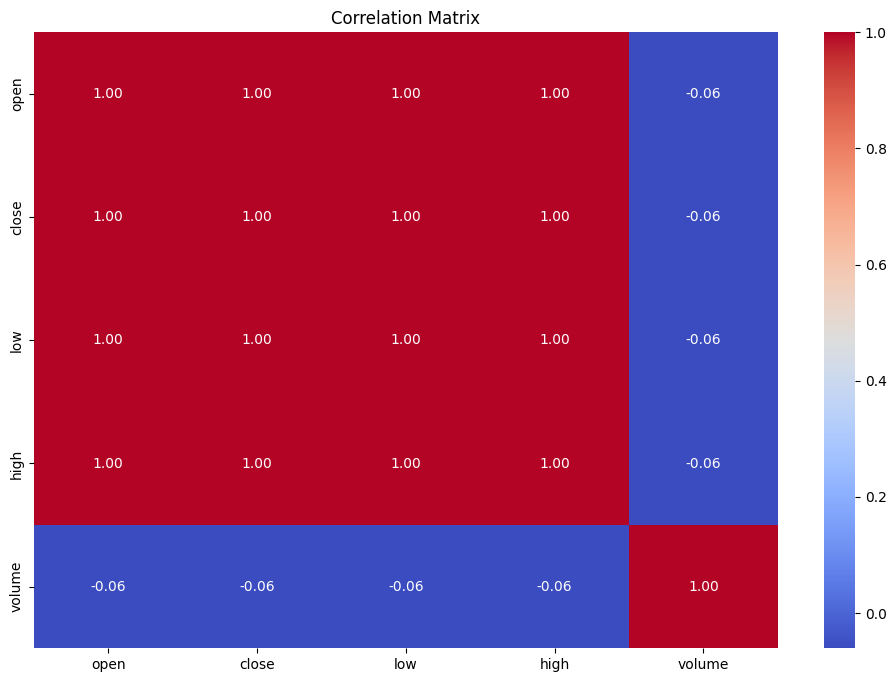

In [10]:
#Correlation Matrix

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

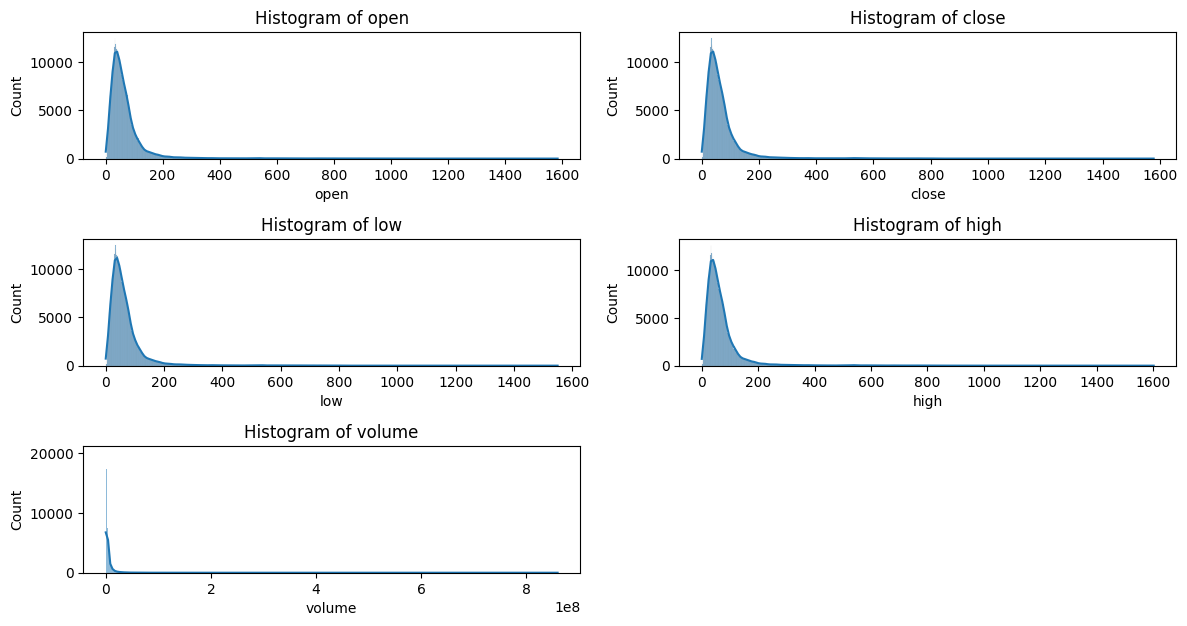

In [11]:
plt.figure(figsize=(12, 8))
for i, (column, data) in enumerate(list(dataset.items())[2:], 1):
    plt.subplot(4, 2, i)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

<ipython-input-12-4f8feba6c0c5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


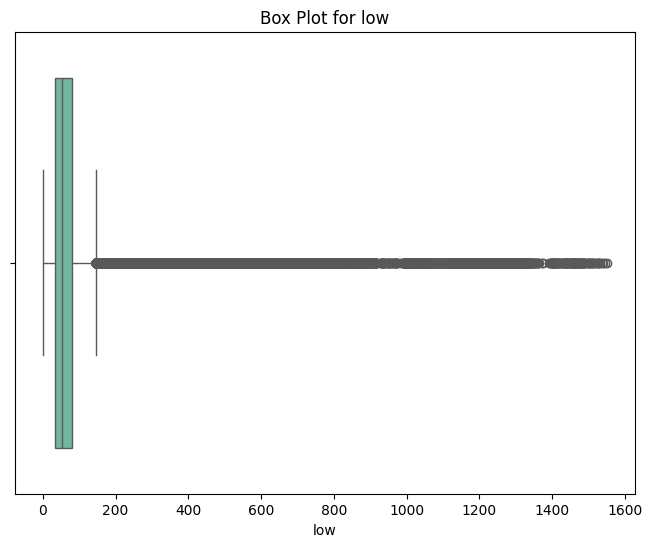

<ipython-input-12-4f8feba6c0c5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


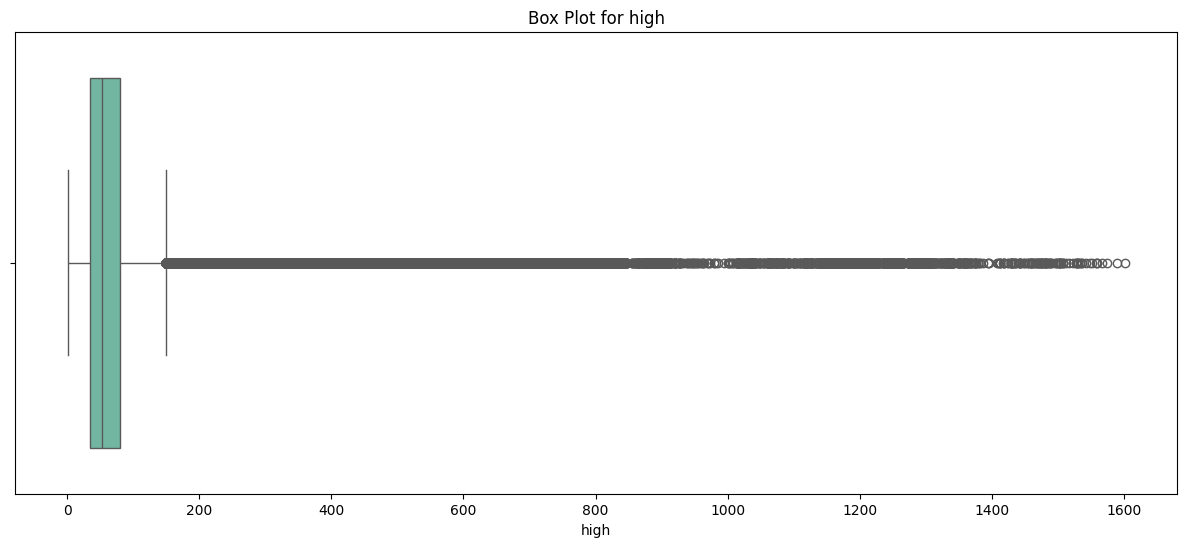

<ipython-input-12-4f8feba6c0c5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


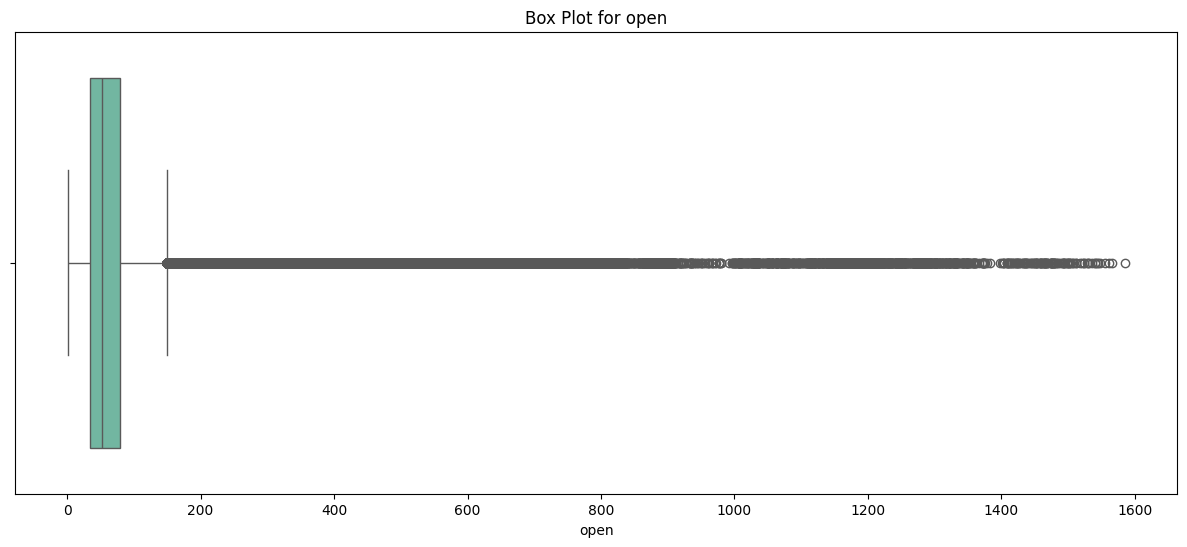

<ipython-input-12-4f8feba6c0c5>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


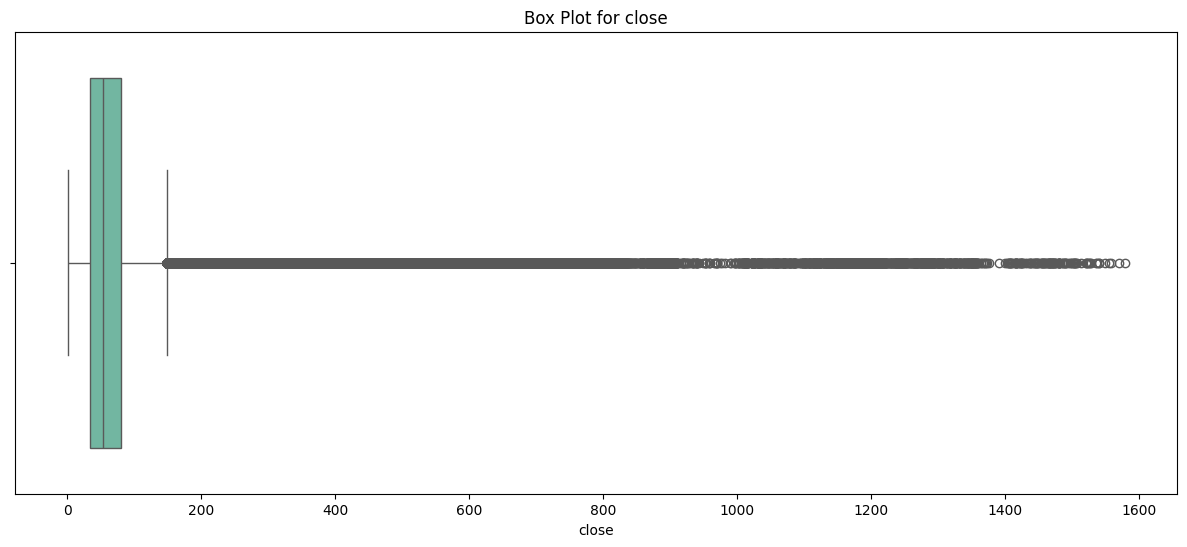

<ipython-input-12-4f8feba6c0c5>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


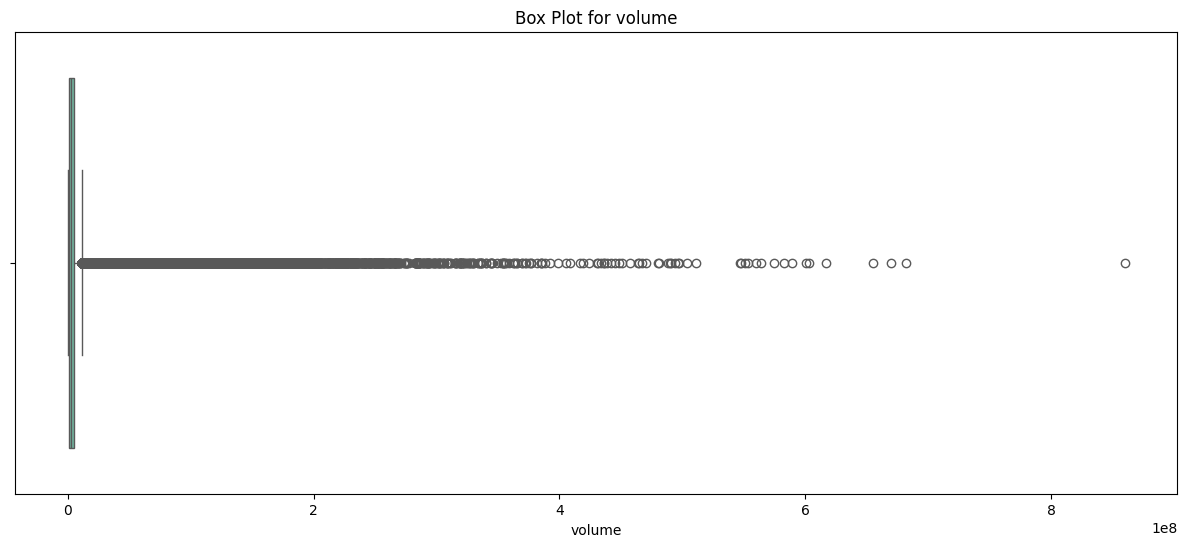

In [12]:
column_name = 'low'

plt.figure(figsize=(8, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()

column_name = 'high'

plt.figure(figsize=(15, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()

column_name = 'open'

plt.figure(figsize=(15, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()

column_name = 'close'

plt.figure(figsize=(15, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()

column_name = 'volume'

plt.figure(figsize=(15, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()

In [13]:
numeric_columns = ['open', 'close', 'low', 'high', 'volume']

Q1 = dataset[numeric_columns].quantile(0.25)
Q3 = dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_mask = ((dataset[numeric_columns] < (Q1 - 1.5 * IQR)) | (dataset[numeric_columns] > (Q3 + 1.5 * IQR)))

outliers_count = outliers_mask.sum()

print(outliers_count)


open      54705
close     54651
low       54533
high      54735
volume    82488
dtype: int64


In [14]:
numeric_columns = ['open', 'close', 'low', 'high', 'volume']
Q1 = dataset[numeric_columns].quantile(0.25)
Q3 = dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for column in numeric_columns:
    dataset[column] = np.clip(dataset[column], lower_bound[column], upper_bound[column])

In [15]:
numeric_columns = ['open', 'close', 'low', 'high', 'volume']

Q1 = dataset[numeric_columns].quantile(0.25)
Q3 = dataset[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_mask = ((dataset[numeric_columns] < (Q1 - 1.5 * IQR)) | (dataset[numeric_columns] > (Q3 + 1.5 * IQR)))

outliers_count = outliers_mask.sum()

print(outliers_count)

open      0
close     0
low       0
high      0
volume    0
dtype: int64


<ipython-input-16-bab4c5697c62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


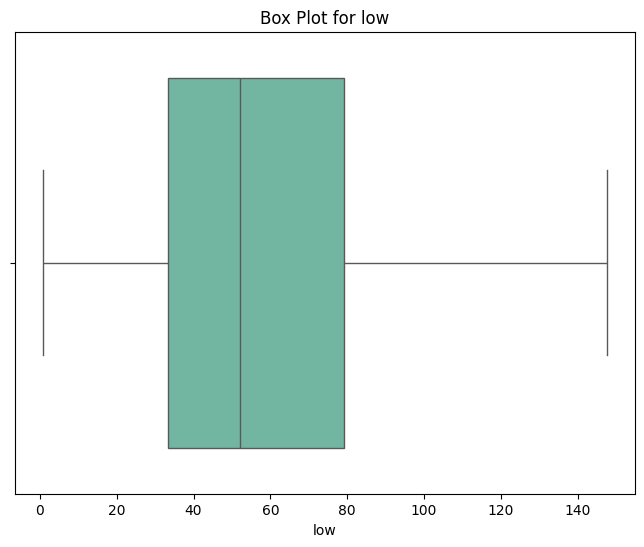

<ipython-input-16-bab4c5697c62>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


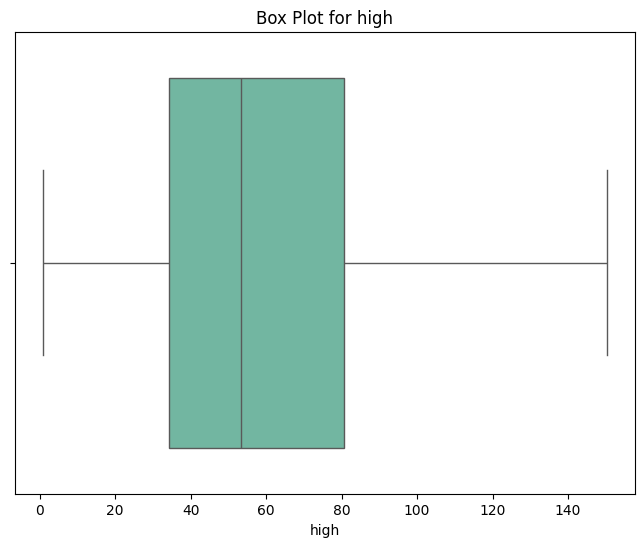

<ipython-input-16-bab4c5697c62>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


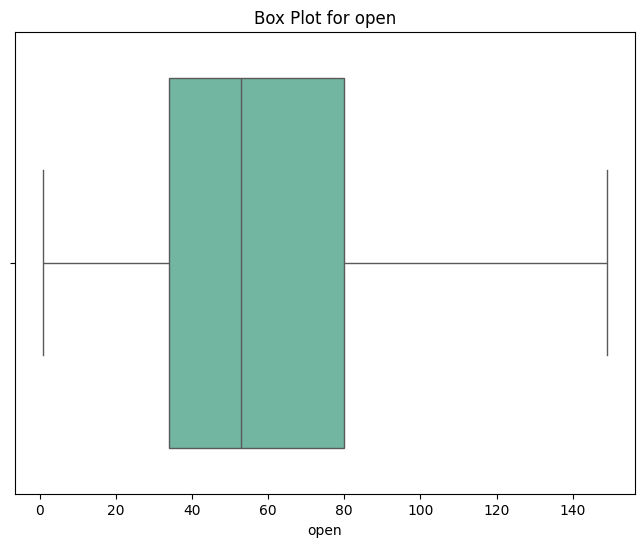

<ipython-input-16-bab4c5697c62>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


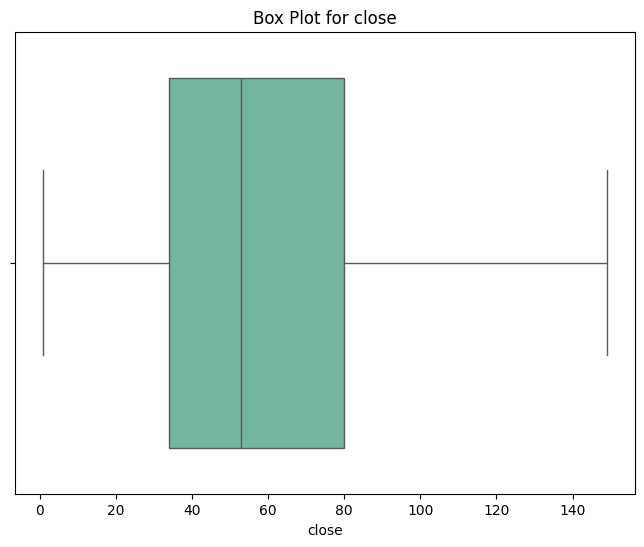

<ipython-input-16-bab4c5697c62>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[column_name], palette='Set2')


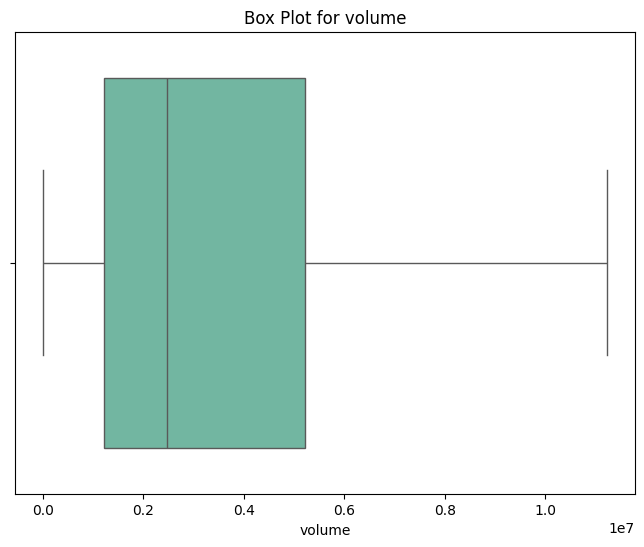

In [16]:
column_name = 'low'

plt.figure(figsize=(8, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()

column_name = 'high'

plt.figure(figsize=(8, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()

column_name = 'open'

plt.figure(figsize=(8, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()


column_name = 'close'

plt.figure(figsize=(8, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()


column_name = 'volume'

plt.figure(figsize=(8, 6))

sns.boxplot(x=dataset[column_name], palette='Set2')

plt.title(f'Box Plot for {column_name}')
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset[['open', 'high', 'low', 'volume']]
y = dataset['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['open', 'high', 'low', 'volume']])
X_test_scaled = scaler.transform(X_test[['open', 'high', 'low', 'volume']])

In [18]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # Adjust n_neighbors as needed
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [21]:
from sklearn.metrics import r2_score

# Assuming you have already trained and defined your KNN regressor model
y_pred_regressor = knn_regressor.predict(X_test_scaled)

r2_knn_test = r2_score(y_test, y_pred_regressor) * 100  # Convert to percentage
print(f'KNN Regressor - R-squared (Coefficient of Determination) for Test Data: {r2_knn_test:.2f}%')

y_pred_train_regressor = knn_regressor.predict(X_train_scaled)
r2_knn_train = r2_score(y_train, y_pred_train_regressor) * 100  # Convert to percentage
print(f'KNN Regressor - R-squared (Coefficient of Determination) for Training Data: {r2_knn_train:.2f}%')


KNN Regressor - R-squared (Coefficient of Determination) for Test Data: 99.99%
KNN Regressor - R-squared (Coefficient of Determination) for Training Data: 99.99%


In [24]:
while True:
    open_val = float(input("Enter open value: "))
    low_val = float(input("Enter low value: "))
    high_val = float(input("Enter high value: "))
    volume_val = float(input("Enter volume value: "))

    user_input = pd.DataFrame([[open_val, high_val, low_val, volume_val]], columns=['open', 'high', 'low', 'volume'])
    user_input_scaled = scaler.transform(user_input)

    predicted_close_regressor = knn_regressor.predict(user_input_scaled)
    print("Regressor - Predicted close value:", predicted_close_regressor[0])

    choice = input("Do you want to make another prediction? (y/n): ")
    if choice.lower() != 'y':
        break

Enter open value: 110.42
Enter low value: 107.3
Enter high value: 111.4
Enter volume value: 563100
Regressor - Predicted close value: 108.26000059999998
Do you want to make another prediction? (y/n): n


In [25]:
y_class = np.where(y > y.median(), 1, 0)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_class, y_train_class)


KNeighborsClassifier()

In [31]:
y_pred_classifier = knn_classifier.predict(X_test_class)
accuracy_cls = accuracy_score(y_test_class, y_pred_classifier) * 100
precision_cls = precision_score(y_test_class, y_pred_classifier) * 100
recall_cls = recall_score(y_test_class, y_pred_classifier) * 100
f1_cls =f1_score(y_test_class, y_pred_classifier) * 100

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print(f'Classifier - Accuracy: {accuracy_cls:.2f}%')
print(f'Classifier - Precision: {precision_cls:.2f}%')
print(f'Classifier - Recall: {recall_cls:.2f}%')
print(f'Classifier - F1-Score: {f1_cls:.2f}%')

Classifier - Accuracy: 85.94%
Classifier - Precision: 89.10%
Classifier - Recall: 81.85%
Classifier - F1-Score: 85.32%
